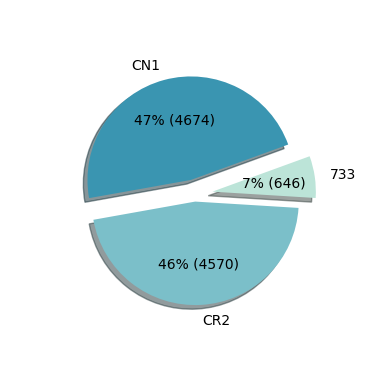

In [117]:
import matplotlib.pyplot as plt

# Datos
fig, ax = plt.subplots()
aviones = DF_E1.Avión
frecuencia = ['4674', '4570', '646']
explotar = (0.1, 0.05, 0.12)
colors = ['#3A95B1', '#7BBFC9', '#BCE4D8']

def autopct_fun(frecuencia):
    gen = iter(frecuencia)
    return lambda pct: f"{pct:1.0f}% ({next(gen)})"

plt.pie(frecuencia, labels=aviones, explode=explotar, colors=colors,
        autopct= autopct_fun(frecuencia),
        shadow=True, startangle=20,
        pctdistance=0.6, radius=0.7, labeldistance=1.15)


plt.show()

In [24]:
#Importamos librerias necesarias
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

#Conexion con la base de datos 
conn = sqlite3.connect('travel.sqlite')

E2 = "SELECT  flights.aircraft_code AS Avion, ticket_flights.fare_conditions AS Condiciones_de_vuelo, SUM(CASE WHEN ticket_flights.fare_conditions = 'Economy' THEN 1 ELSE 0 END) AS TICKETS_ECONOMY, SUM(CASE WHEN ticket_flights.fare_conditions = 'Comfort' THEN 1 ELSE 0 END) AS TICKETS_COMFROT, SUM(CASE WHEN ticket_flights.fare_conditions = 'Business' THEN 1 ELSE 0 END) AS TICKETS_BUSINESS, count (ticket_flights.fare_conditions) AS TOTAL_TICKETS FROM flights INNER JOIN ticket_flights ON ticket_flights.flight_id = flights.flight_id WHERE status IN ('Arrived') AND aircraft_code IN ('CR2','733','CN1') GROUP by flights.aircraft_code ORDER BY TICKETS_ECONOMY DESC;"

DF_E2 = pd.read_sql_query(sql = E2, con = conn)
DF_E2

,Avion,Condiciones_de_vuelo,TICKETS_ECONOMY,TICKETS_COMFROT,TICKETS_BUSINESS,TOTAL_TICKETS
0,CR2,Economy,83311,0,0,83311
1,733,Business,42988,0,4365,47353
2,CN1,Economy,8095,0,0,8095


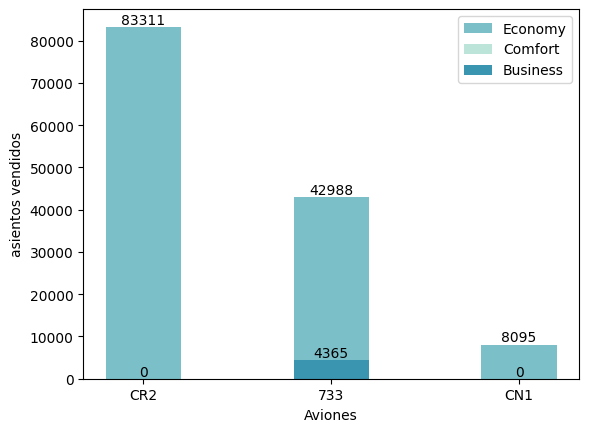

In [52]:
import matplotlib.pyplot as plt
import numpy as np 

fig, ax = plt.subplots()
x = DF_E2.Avion

clase_economy = DF_E2.TICKETS_ECONOMY
clase_comfort = DF_E2.TICKETS_COMFROT
clase_business = DF_E2.TICKETS_BUSINESS

plt.bar(x, clase_economy, 0.4, label = "Economy", color = "#7BBFC9")
plt.bar(x, clase_comfort, 0.4, label = "Comfort", color = "#BCE4D8")
plt.bar(x, clase_business, 0.4, label = "Business", color = "#3A95B1")

# Añadir etiquetas a las barras
for i, v in enumerate(clase_economy):
    plt.text(i, v, str(v), ha='center', va='bottom')
# Añadir etiquetas a las barras
for i, v in enumerate(clase_business):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel("Aviones")
plt.ylabel("asientos vendidos")


plt.legend()
plt.show()